# Analysis of credit data

- n = 1000 samples 
- m = 50 features
- 50/50 train test split

## Approaches

- Logistic Regression
- Discriminant Analysis
- Tree-based method
- Naive Bayes

# Data import, quick and dirty methods 

- Scatter matrix
- Dimensionality reduction, plotting



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import rcParams 
sns.set_theme(style="ticks")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Meiryo']


In [14]:
FIG_OUTPUT = "./fig/"

credit = pd.read_csv("german_credit.csv")
credit_raw = credit.copy(deep=True)
pd.options.display.max_columns = None

In [15]:
credit.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


In [16]:
credit.shape

(1000, 21)

In [17]:
credit.isna().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

In [18]:
credit.dtypes

Creditability                        int64
Account Balance                      int64
Duration of Credit (month)           int64
Payment Status of Previous Credit    int64
Purpose                              int64
Credit Amount                        int64
Value Savings/Stocks                 int64
Length of current employment         int64
Instalment per cent                  int64
Sex & Marital Status                 int64
Guarantors                           int64
Duration in Current address          int64
Most valuable available asset        int64
Age (years)                          int64
Concurrent Credits                   int64
Type of apartment                    int64
No of Credits at this Bank           int64
Occupation                           int64
No of dependents                     int64
Telephone                            int64
Foreign Worker                       int64
dtype: object

In [19]:
credit["Creditability"].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

In [20]:
# Flipping values in creditability such that minority classes 
credit["Creditability"] = credit["Creditability"].apply(lambda x: 1-x)

In [21]:
credit["Creditability"].value_counts()

0    700
1    300
Name: Creditability, dtype: int64

In [22]:
credit.describe()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,0.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [23]:
#turn into Japanese columns

columns_JP = {
    "Creditability" : "信用(Y)",
    "Account Balance" : "銀行口座残高",
    "Duration of Credit (month)" : "ローン期間",
    "Payment Status of Previous Credit" : "前回のローンの状態",
    "Purpose": "目的",
    "Credit Amount": "ローン金額",
    "Value Savings/Stocks" : "貯金・株残高",
    "Length of current employment" : "雇用期間（ただいまの仕事）",
    "Instalment per cent" : "収入に対しローンの割合", 
    "Sex & Marital Status" : "性別・婚姻状況",
    "Guarantors" : "保証人",
    "Duration in Current address" : "現住所に住んでいた期間",
    "Most valuable available asset" : "最も価値のあるアセット",
    "Age (years)" : "年齢",
    "Concurrent Credits" : "その他のローン",
    "Type of apartment" : "住所タイプ",
    "No of Credits at this Bank" : "同銀行ローン数",
    "Occupation" : "職業",
    "No of dependents" : "扶養者数",
    "Telephone" : "電話",
    "Foreign Worker" : "労働形態"
}

credit.rename(columns=columns_JP, inplace=True)
credit								

,信用(Y),銀行口座残高,ローン期間,前回のローンの状態,目的,ローン金額,貯金・株残高,雇用期間（ただいまの仕事）,収入に対しローンの割合,性別・婚姻状況,保証人,現住所に住んでいた期間,最も価値のあるアセット,年齢,その他のローン,住所タイプ,同銀行ローン数,職業,扶養者数,電話,労働形態
0,0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,0,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,0,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,0,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,0,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1
996,1,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
997,1,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1
998,1,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1


In [24]:
# scatter matrix

# plt.figure(figsize=(20, 20))
# scatter_matrix = sns.pairplot(credit, hue="信用(Y)")
# scatter_matrix.savefig("scatter.png")

In [25]:
# dimensionality reduction thorugh tSNE
from sklearn.manifold import TSNE

credit_Y = credit["信用(Y)"]
credit_X = credit.drop("信用(Y)", axis=1)
X_embedded = TSNE(n_components=2).fit_transform(credit_X)

In [26]:
# # plotting
# tSNE_df = pd.DataFrame(X_embedded, columns=["次元1", "次元2"])
# tSNE_df["信用(Y)"] = credit_Y 
# tSNE_plot = sns.FacetGrid(tSNE_df, hue="信用(Y)", height=10).map(plt.scatter, "次元1", "次元2").add_legend()
# plt.title("tSNE, perplexity=30.0")
# tSNE_plot.savefig("tSNE_pre.png")

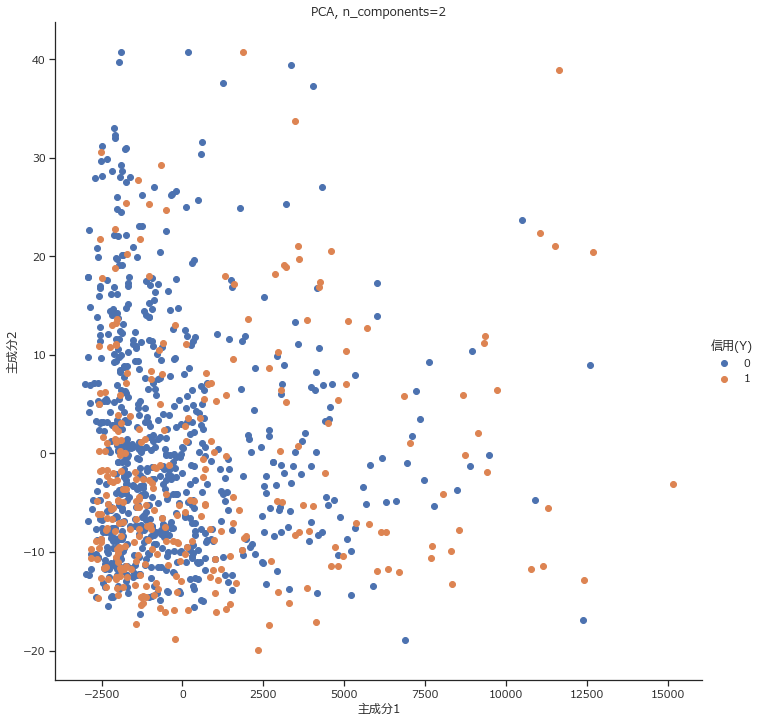

In [27]:
from sklearn import decomposition 

pca = decomposition.PCA(n_components=2)
pca_X = pca.fit_transform(credit_X)
pca_df = pd.DataFrame(pca_X, columns=["主成分1", "主成分2"])
pca_df["信用(Y)"] = credit_Y 

pca_plot = sns.FacetGrid(pca_df, hue="信用(Y)", height=10).map(plt.scatter, "主成分1", "主成分2").add_legend()
plt.title("PCA, n_components=2")
pca_plot.savefig("PCA.png")


# Data Cleaning 

- Merging of categories
- plotting of pivot tables for categories
- Variable selection 

In [28]:
# parse age. duration of credit, and amount of credit into categories 

credit["年齢"] = pd.cut(x=credit["年齢"], bins=[0,25,39,59,64,150], labels=[i for i in range(1,6,1)]).astype("int64")
credit["ローン期間"] = pd.cut(x=credit["ローン期間"], bins=[-1, 6, 12, 18, 24, 30, 36, 42, 48, 54, 73], labels=[i for i in range(1, 11, 1)]).astype("int64")
credit["ローン金額"] = pd.cut(x=credit["ローン金額"], bins=[-1, 500, 1000, 1500, 2500, 5000, 7500, 10000, 15000, 20000], labels=[i for i in range(1, 10, 1)]).astype("int64")

In [29]:
# merge categories into more representative ones, according to https://online.stat.psu.edu/stat508/resources/analysis/gcd/gcd.1

to_modify = ("銀行口座残高", 
                "前回のローンの状態", 
                "貯金・株残高", 
                "雇用期間（ただいまの仕事）", 
                "職業", 
                "性別・婚姻状況",
                "同銀行ローン数",
                "保証人",
                "その他のローン",
                "目的"
                ) 


def merge_categories(val, name=None):
    columns = {"銀行口座残高":{
                    1:1, 2:2, 3:3, 4:3
                }, 
                "前回のローンの状態" : {
                    0:0, 1:0, 2:1, 3:2, 4:2
                }, 
                "貯金・株残高" : {
                    1:1, 2:2, 3:3, 4:3, 5:4
                }, 
                "雇用期間（ただいまの仕事）" : {
                    1:1, 2:1, 3:2, 4:3, 5:4 
                }, 
                "職業" : {
                    1:1, 2:1, 3:2, 4:3
                }, 
                "性別・婚姻状況" : {
                    1:1, 2:1, 3:2, 4:3
                },
                "同銀行ローン数" : {
                    1:1, 2:2, 3:2, 4:2
                },
                "保証人" : {
                    1:1, 2:2, 3:2
                },
                "その他のローン" : {
                    1:1, 2:1, 3:2
                },
                "目的" : {
                    0:0, 1:1, 2:2, 3:3, 4:3, 5:3, 6:3, 7:4, 8:5, 9:6, 10:7
                }
                }
    return int(columns[name][val])

for column in to_modify:
    credit[column] = credit[column].apply(func=merge_categories, name=column)


# save "clean" data

credit.to_csv("clean_credit.csv")


In [30]:
credit["その他のローン"].value_counts()

2    814
1    186
Name: その他のローン, dtype: int64

In [31]:
# x_labels = {
#     "クレジット残高": ["口座なし", "残高0", "残高>0"],
#     "前回のローンの状態": ["問題あり", "問題なし", "この銀行では問題なし"],
#     "目的" : ["その他", "新車", "中古車", "家関係", "旅行", "教育", "ビジネス"],
#     "ローン金額" : ["(0, 500]DM", "(500, 1000]DM", "(1000, 1500]DM", 
#     "(1500, 2500]DM", "(2500, 5000]DM", "(5000, 7500]DM", "(7500, 10000]DM", "(10000, 15000]DM", "(15000, 20000]DM"],
#     "貯金・株残高" : ["0", "<100DM", "[100, 1000]DM", ">1000DM"],
#     "雇用期間（ただいまの仕事）" : ["<1年間・無職", "[1,4)年間", "[4, 7)年間", ">7年間"],
#     "収入に対しローンの割合" : [">=35%", "[25, 35)%", "[20, 25)%", "<20%"],
#     "性別・婚姻状況" : ["男性単身", "男性結婚", "女性"],
#     "保証人" : ["なし", "あり"],
#     "現住所に住んでいた期間" : ["<1年間", "[1, 4)年間", "[4, 7)年間", ">7年間"],
#     "最も価値のあるアセット" : ["なし", "車両", "生命保険", "不動産"],
#     "年齢" : ["<26歳", "[26, 40)歳", "[40, 60)歳", "[60, 65)歳", ">=65歳"],
#     "その他のローン" : ["他の銀行・デパート", "なし"],
#     "住所タイプ" : ["無料", "賃貸", "所有" ],
#     "同銀行ローン数" : ["1", ">1"],
#     "職業" : ["単純労働者", "熟練労働者", "経営者"],
#     "扶養者数" : ["3人また以上", "0-2人"],
#     "電話" : ["電話なし", "電話あり"],
#     "労働形態" : ["外国籍労働者", "本国籍労働者"],
#     "ローン期間" : ["<=6月", "(6, 12]月", "(12, 18]月","(18, 24]月","(24, 30]月","(30, 36]月", "(36, 42]月", "(42, 48]月", "(48, 54]月", ">54月"]
# }

# diagonal_labels = ["ローン金額", "ローン期間"]

# def autolabel(rects, ax):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate(f'{height:.2f}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# for key, labels in x_labels.items():
    
#     print(key)

#     #create sub-dataframe using agg, 
#     grouped = credit.groupby(key).agg(
#         total = ("信用(Y)", "size"),
#         credible = ("信用(Y)","sum")
#     ) 
#     grouped[str(grouped.index.name)] = grouped.index
#     grouped["credible_percent"] = (grouped["credible"] / grouped["total"]) 
#     grouped.sort_index()

#     #location of bars 
#     x = np.arange(len(grouped.index))
#     width = 0.35
#     fig, ax1 = plt.subplots(figsize=(10,6))

#     #plot first axes, total number of people 
#     COLOR = "tab:red"
#     ax1.set_ylabel("総人数", color=COLOR)
#     rects1 = ax1.bar(x - width/2, grouped["total"], width, label='総人数', color=COLOR)
#     ax1.tick_params(axis='y', labelcolor=COLOR)
#     ax1.set_xticks(x)
#     ax1.set_xticklabels(labels)
#     if grouped.index.name in diagonal_labels:
#         ax1.set_xticklabels(labels ,rotation=40)

#     #plot second axes with different y-axis scaling, ratio of people who repay back 
#     COLOR = "tab:blue"
#     ax2 = ax1.twinx()
#     ax2.set_ylabel("良い信用割合", color=COLOR)
#     rects2 = ax2.bar(x + width/2, grouped["credible_percent"], width, label='良い信用割合', color=COLOR)
#     ax2.tick_params(axis='y', labelcolor=COLOR)
#     ax2.set_ylim(0.0, 1.0)

#     autolabel(rects1, ax1)
#     autolabel(rects2, ax2)

#     fig.legend()
#     ax1.set_title(grouped.index.name + "により分類", {'fontsize': 18.0}  )
#     fig.savefig(grouped.index.name)

In [32]:
credit.columns

Index(['信用(Y)', '銀行口座残高', 'ローン期間', '前回のローンの状態', '目的', 'ローン金額', '貯金・株残高',
       '雇用期間（ただいまの仕事）', '収入に対しローンの割合', '性別・婚姻状況', '保証人', '現住所に住んでいた期間',
       '最も価値のあるアセット', '年齢', 'その他のローン', '住所タイプ', '同銀行ローン数', '職業', '扶養者数', '電話',
       '労働形態'],
      dtype='object')

In [33]:
# Univariate variable selection using chisquared test

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def color_p_red(val):
    """
    returns red for variables with p < 0.05
    """
    color = 'red' if val < 0.05 else 'white'
    return f'color: {color}'

credit_Y = credit["信用(Y)"]
credit_X = credit.drop("信用(Y)", axis=1)

chi_square, pval = chi2(credit_X, credit_Y)

chi_p = pd.DataFrame(pval, index=credit_X.columns)
chi_p = chi_p.style.applymap(color_p_red)

chipruned_X = credit_X[chi_p[chi_p < 0.05].dropna().index]

In [36]:
chi_p = pd.DataFrame(pval, index=credit_X.columns)
chi_p = chi_p.style.applymap(color_p_red)
chi_p

,0
銀行口座残高,0.000000
ローン期間,0.000000
前回のローンの状態,0.000144
目的,0.480406
ローン金額,0.018053
貯金・株残高,0.000001
雇用期間（ただいまの仕事）,0.008326
収入に対しローンの割合,0.137598
性別・婚姻状況,0.215919
保証人,0.994734


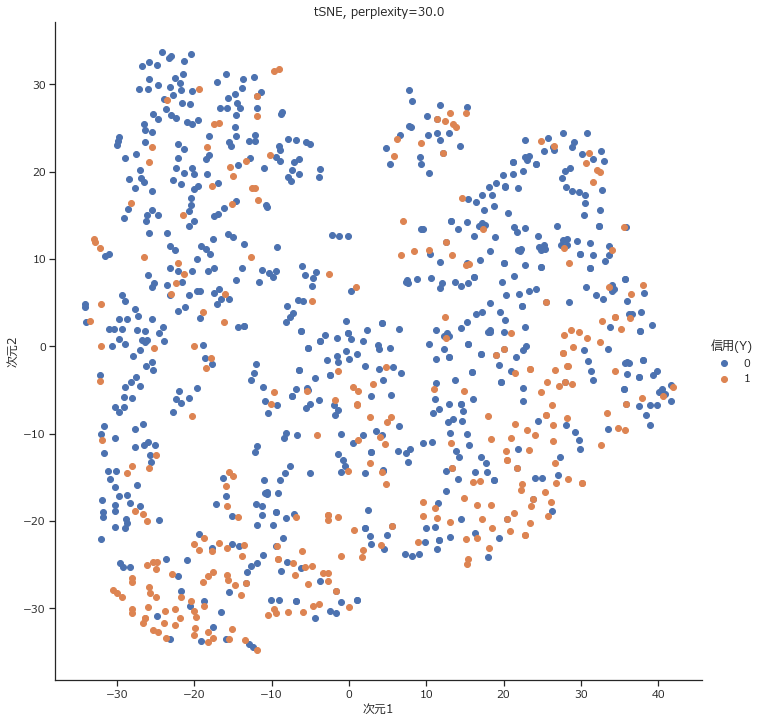

In [22]:
# visualization of pruned dataset

X_embedded = TSNE(n_components=2).fit_transform(chipruned_X)
tSNE_df = pd.DataFrame(X_embedded, columns=["次元1", "次元2"])
tSNE_df["信用(Y)"] = credit_Y 
tSNE_plot = sns.FacetGrid(tSNE_df, hue="信用(Y)", height=10).map(plt.scatter, "次元1", "次元2").add_legend()
plt.title("tSNE, perplexity=30.0")
tSNE_plot.savefig("tSNE_chiPruned.png")

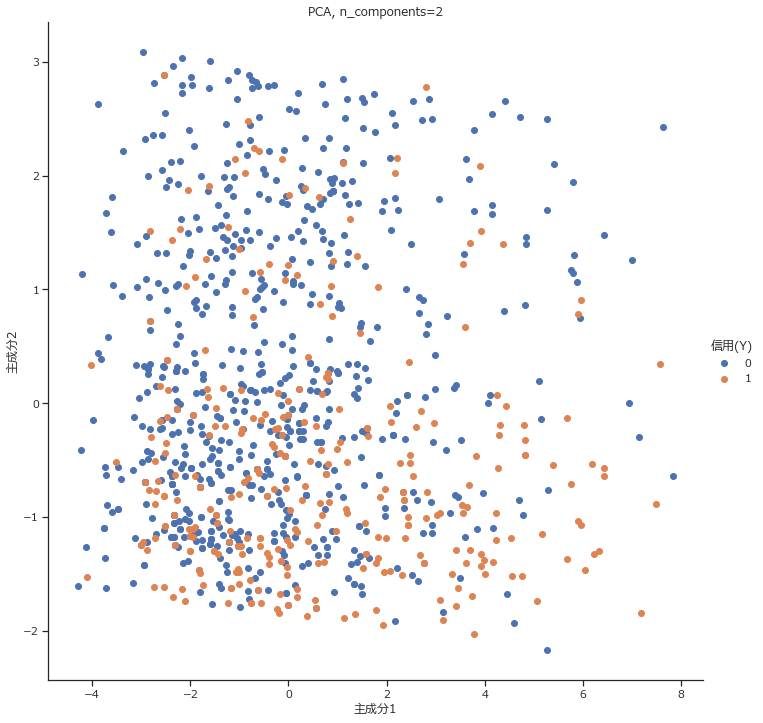

In [23]:
# Visualization of pruned dataset using PCA 
from sklearn import decomposition 

pca = decomposition.PCA(n_components=2)
pca_X = pca.fit_transform(chipruned_X)
pca_df = pd.DataFrame(pca_X, columns=["主成分1", "主成分2"])
pca_df["信用(Y)"] = credit_Y 

pca_plot = sns.FacetGrid(pca_df, hue="信用(Y)", height=10).map(plt.scatter, "主成分1", "主成分2").add_legend()
plt.title("PCA, n_components=2")
pca_plot.savefig("PCA_chiPruned.png")

In [24]:
chipruned = chipruned_X.copy(deep=True)
chipruned["信用(Y)"] = credit_Y
chipruned.to_csv("chipruned.csv", encoding='utf-8-sig')

# Modeling

- Majority class estimator using sklearn.DummyClassifier() random and most_frequent strategies

In [2]:
#numpy imports

# sklearn imports 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN


# Visualize upsampling and down sampling

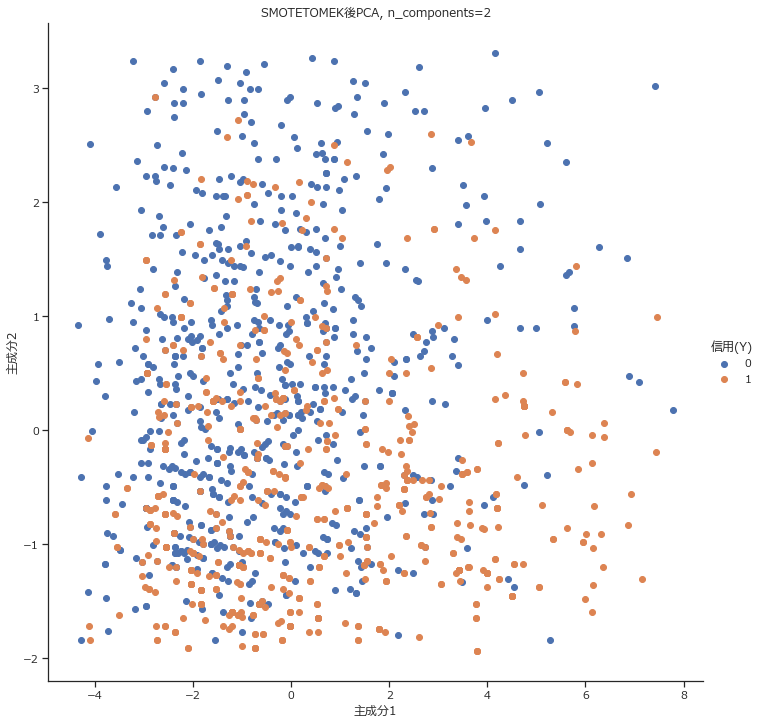

In [49]:
smotetomek = SMOTETomek()
resampled_X, resampled_Y = smotetomek.fit_resample(chipruned_X, credit_Y)

pca = decomposition.PCA(n_components=2)
pca_X = pca.fit_transform(resampled_X)
pca_df = pd.DataFrame(pca_X, columns=["主成分1", "主成分2"])
pca_df["信用(Y)"] = resampled_Y 

pca_plot = sns.FacetGrid(pca_df, hue="信用(Y)", height=10).map(plt.scatter, "主成分1", "主成分2").add_legend()
plt.title("SMOTETOMEK後PCA, n_components=2")
pca_plot.savefig("PCA_resampled")

In [50]:
resampled_Y.value_counts()

0    682
1    682
Name: 信用(Y), dtype: int64

In [51]:
credit_Y.value_counts()

0    700
1    300
Name: 信用(Y), dtype: int64

# Modeling

In [3]:
# helper method for evaluating model 
def evaluate_model(X, y, metric, model):
# define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model on the dataset
    scores = cross_val_score(model, X, y, scoring=metrics[metric], cv=cv, n_jobs=-1)
    # return scores from each fold and each repeat
    return scores

# helper method for precision scoring 
def precision_recall_auc(y_true, y_pred):
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred, pos_label=1)
    return auc(recall, precision)

ftwo_scorer = make_scorer(fbeta_score, beta=2)
pr_auc = make_scorer(score_func=precision_recall_auc, needs_proba=True)

#define the pipelines parameters 
results = []

# metrics = {"accuracy" : "accuracy", 
#             "f1" : "f1", 
#             "roc_auc" : "roc_auc", 
#             "precision" : "precision", 
#             "pr_auc": "average_precision",
#             "pr_aucmanual" : pr_auc,
#             "recall" : "recall"
# }

metrics = {
    "f2" : ftwo_scorer,
    "f1" : "f1"
}

samplings = ["None", 
            "Random",
            ("SMOTEOnly", SMOTE()),
            ("SMOTETomek", SMOTETomek()),
            ("SMOTEENN", SMOTEENN())
            ] 

models = [("minority", DummyClassifier(strategy="constant", constant=1)),
        ("random", DummyClassifier(strategy="uniform")), 
        ("logistic", LogisticRegression()), 
        ("LDA", LinearDiscriminantAnalysis()),
        ("tree", DecisionTreeClassifier()),
        ]




# Model Training/Evaluation Loop

- One Hot transformation for all columns (since all have been transformed into categorical variables)
- Undersampling/Oversampling

In [56]:
#データをロードする
chipruned = pd.read_csv("chipruned.csv")

#サンプリング手法をループする
for sampling in samplings:
    #モデルをループする
    for model in models:
        
        #結果をセーブするdict()
        model_result = dict()
        seq = []

        #one hot transformer for all columns (Note, before undersampling/oversampling )
        seq.append(("OneHot", OneHotEncoder(handle_unknown="ignore")))
        
        #randomはチェインするので特別扱い, Pipelineを使う
        if sampling == "None":
            pass
        elif sampling == "Random":
            seq.append(("RandomOver", RandomOverSampler()))
            seq.append(("RandomUnder", RandomUnderSampler()))
        else:
            seq.append(sampling)

        #append analytical model 
        seq.append(model)
        pipe = Pipeline(seq)
        
        #Pipeの名前を取り出す
        name = ""
        for step in pipe.steps:
            name += str(step[0])
            name += ", "
        model_result["pipe"] = name

        #メトリックスをループする
        for metric in metrics:
            scores = evaluate_model(chipruned_X, credit_Y, metric, pipe) 
            model_result[metric + "_mean"] = np.mean(scores)
            model_result[metric + "_var"] = np.var(scores)
            # print(f'{metric} Mean: {np.mean(scores)}, (Var:{np.var(scores)})' )
            
        results.append(model_result)


In [57]:
#highlight final results within dataframe
final_results = pd.DataFrame(results).set_index('pipe')
final_results.style.highlight_max(color = 'red', axis = 0)

,f2_mean,f2_var
pipe,,
"OneHot, minority,",0.681818,0.000000
"OneHot, random,",0.447207,0.003952
"OneHot, logistic,",0.470612,0.003137
"OneHot, LDA,",nan,nan
"OneHot, tree,",0.470003,0.009088
"OneHot, RandomOver, RandomUnder, minority,",0.681818,0.000000
"OneHot, RandomOver, RandomUnder, random,",0.423604,0.005956
"OneHot, RandomOver, RandomUnder, logistic,",0.671456,0.003351
"OneHot, RandomOver, RandomUnder, LDA,",nan,nan


# Cost sensitive modeling

## Weighted logistic regression

In [4]:
#Weighted logistic regression 

from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

#read data from .csv file 
chipruned = pd.read_csv("chipruned.csv")
credit_Y = chipruned["信用(Y)"].copy(deep=True) 
chipruned_X = chipruned.drop("信用(Y)", axis=1)

# Weighted logistic regression 
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:3.0, 1:7.0}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(logistic__class_weight=balance)

results = pd.DataFrame()

#define cv
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

seq = [("OneHot", OneHotEncoder(handle_unknown='ignore')), ("logistic", LogisticRegression(solver='lbfgs'))]
pipe = Pipeline(seq)

for metric in metrics:
    
    grid = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1, cv=cv,
        scoring=metrics[metric])

    # execute the grid search
    grid_result = grid.fit(chipruned_X, credit_Y)

    results = pd.DataFrame(grid_result.cv_results_)

    #report ebst configuration
    print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

    # report all configurations
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    for mean, stdev, param in zip(means, stds, params):
        print(f'{metric}:{mean} {stdev} with: {param}')

C:\Users\undec\miniconda3\envs\imba\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
Best: 0.706231 using {'logistic__class_weight': {0: 1, 1: 10}}
f2:0.006853181592376823 0.01862289305391975 with: {'logistic__class_weight': {0: 100, 1: 1}}
f2:0.0610472751330168 0.042578615546416704 with: {'logistic__class_weight': {0: 10, 1: 1}}
f2:0.4663248772453402 0.05433358746163474 with: {'logistic__class_weight': {0: 1, 1: 1}}
f2:0.6140207752637894 0.07091783909937853 with: {'logistic__class_weight': {0: 3.0, 1: 7.0}}
f2:0.7062307175563682 0.05336

In [8]:
writer = pd.ExcelWriter("tes5t.xlsx")

chipruned_X.to_excel(writer, "chipruned_2")
writer.save()

## Weighted Decision Trees

In [54]:
# grid search class weights with decision tree for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Weighted logistic regression 
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:3.0, 1:7.0}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(tree__class_weight=balance)

#define cv
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

seq = [("OneHot", OneHotEncoder(handle_unknown='ignore')), ("tree", DecisionTreeClassifier())]
pipe = Pipeline(seq)

for metric in metrics:
    
    grid = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1, cv=cv,
        scoring= metrics[metric])

    # execute the grid search
    grid_result = grid.fit(chipruned_X, credit_Y)

    #report ebst configuration
    print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
    # report all configurations
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    for mean, stdev, param in zip(means, stds, params):
        print(f'{metric}:{mean} ({stdev}) with: {param}')

Best: 0.526227 using {'tree__class_weight': {0: 100, 1: 1}}
f2:0.5262270962765806 (0.06390093648691424) with: {'tree__class_weight': {0: 100, 1: 1}}
f2:0.5024977641570487 (0.08027396423967631) with: {'tree__class_weight': {0: 10, 1: 1}}
f2:0.47427982131709945 (0.09884465542750616) with: {'tree__class_weight': {0: 1, 1: 1}}
f2:0.45212652135065673 (0.08385351158810381) with: {'tree__class_weight': {0: 3.0, 1: 7.0}}
f2:0.4448518531070792 (0.06585181915152638) with: {'tree__class_weight': {0: 1, 1: 10}}
f2:0.4332707478669163 (0.08254110076467432) with: {'tree__class_weight': {0: 1, 1: 100}}


## Weighted Support Vector Classifier

In [55]:
# grid search class weights with decision tree for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

# Weighted logistic regression 
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:3.0, 1:7.0}, {0:1,1:10}, {0:1,1:100}]
param_grid = dict(SVC__class_weight=balance)

#define cv
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

seq = [("OneHot", OneHotEncoder(handle_unknown='ignore')), ("SVC", SVC(gamma='scale'))]
pipe = Pipeline(seq)

for metric in metrics:
    
    grid = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1, cv=cv,
        scoring= metrics[metric])

    # execute the grid search
    grid_result = grid.fit(chipruned_X, credit_Y)

    #report ebst configuration
    print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
    # report all configurations
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    for mean, stdev, param in zip(means, stds, params):
        print(f'{metric}:{mean} ({stdev}) with: {param}')

Best: 0.662989 using {'SVC__class_weight': {0: 1, 1: 10}}
f2:0.1684002681255782 (0.04944700724490468) with: {'SVC__class_weight': {0: 100, 1: 1}}
f2:0.1684002681255782 (0.04944700724490468) with: {'SVC__class_weight': {0: 10, 1: 1}}
f2:0.41561491065104417 (0.06839929975430872) with: {'SVC__class_weight': {0: 1, 1: 1}}
f2:0.5738738639686548 (0.08277818661788132) with: {'SVC__class_weight': {0: 3.0, 1: 7.0}}
f2:0.6629891850337173 (0.05717590077127232) with: {'SVC__class_weight': {0: 1, 1: 10}}
f2:0.6609690143148611 (0.05615896741307535) with: {'SVC__class_weight': {0: 1, 1: 100}}
